**Question 8 (10 points)**

Note: Submit the code in a jupyter notebook or Google Colab with your assignment.

Load the titanic dataset using seaborn using and answer the questions below

```python3
import seaborn as sns
df = sns.load_dataset(‘titanic’);
```

Study the dataset and the goal here: https://www.kaggle.com/competitions/titanic
You can use seaborn or matplotlib or both.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# check duplicated values
df.duplicated().sum()

107

In [5]:
df2 = df.drop_duplicates()
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# check missing values
df2.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# check variable type
df2.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

(i) Using cross tabulations and heatmaps - find which ticket class had the most survivors. (2 points)

In [8]:
# convert thesse columns to category type to save memory
category_type = ["survived", "pclass", "sex", "sibsp","parch"]

df2[category_type] = df2[category_type].astype("category")
df2.dtypes

survived       category
pclass         category
sex            category
age             float64
sibsp          category
parch          category
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
cross = pd.crosstab(df2["survived"],df2["pclass"])
cross

pclass,1,2,3
survived,,,
0,79,81,301
1,135,84,104


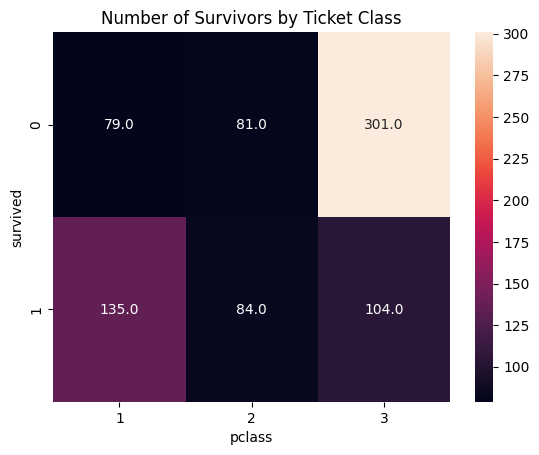

In [10]:
sns.heatmap(cross, annot=True, fmt=".1f")
plt.title("Number of Survivors by Ticket Class")
plt.show()

(ii) Convert parch and sibsp variables to category. Out of those who survived what percentage of samples had 1 parent/child, and what percentage of survivors had 1 sibling/spouse? Round to percentage to 2 decimal places (2 points)

In [11]:
df2["parch"].unique()

[0, 1, 2, 5, 3, 4, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [12]:
df2["sibsp"].unique()

[1, 0, 3, 4, 2, 5, 8]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 8]

- Out of those who survived what percentage of samples had 1 parent/child, 

In [13]:
# Out of those who survived what percentage of samples had 1 parent/child, 
# and what percentage of survivors had 1 parent/child?
cross_2 = pd.crosstab(df2["survived"], df2["parch"], normalize="index")
cross_2

parch,0,1,2,3,4,5,6
survived,,,,,,,
0,0.789588,0.110629,0.075922,0.004338,0.008677,0.008677,0.002169
1,0.668731,0.195046,0.123839,0.009288,0.000000,0.003096,0.000000


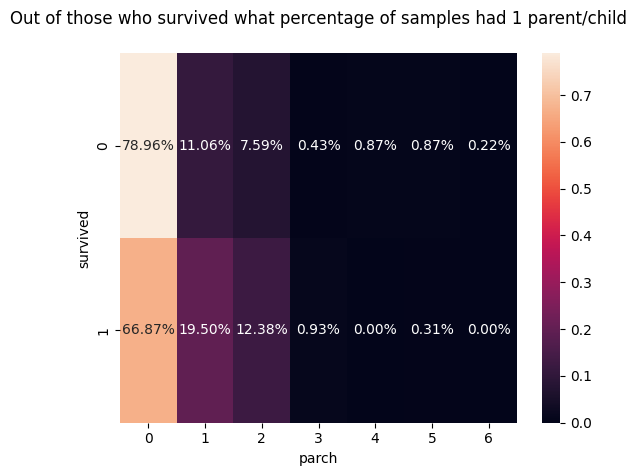

In [14]:
sns.heatmap(cross_2, annot=True, fmt=".2%")
plt.title("Out of those who survived what percentage of samples had 1 parent/child\n")
plt.show()


- Out of those who survived what percentage of samples had 1 siblings / spouse

In [15]:
# Out of those who survived what percentage of samples had 1 parent/child, 
# and what percentage of survivors had 1 sibling/spouse?
cross_3 = pd.crosstab(df2["survived"], df2["sibsp"], normalize="index")
cross_3

sibsp,0,1,2,3,4,5,8
survived,,,,,,,
0,0.694143,0.203905,0.032538,0.021692,0.032538,0.010846,0.004338
1,0.609907,0.331269,0.037152,0.012384,0.009288,0.000000,0.000000


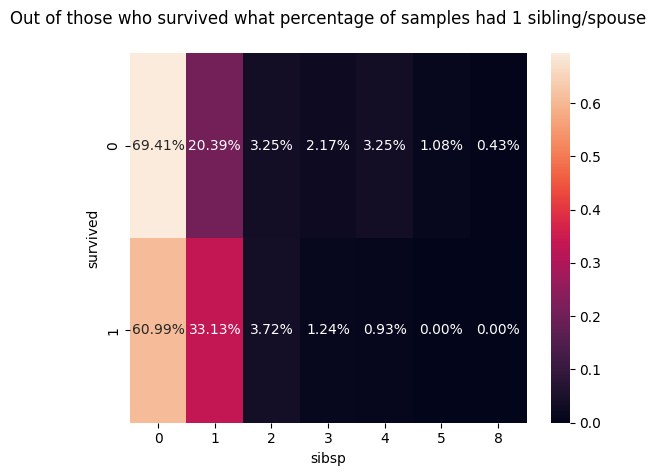

In [16]:
sns.heatmap(cross_3, annot=True, fmt=".2%")
plt.title("Out of those who survived what percentage of samples had 1 sibling/spouse\n")
plt.show()

(iii) Does Age determine Survivorship? Plot and write your interpretation. (2 points)

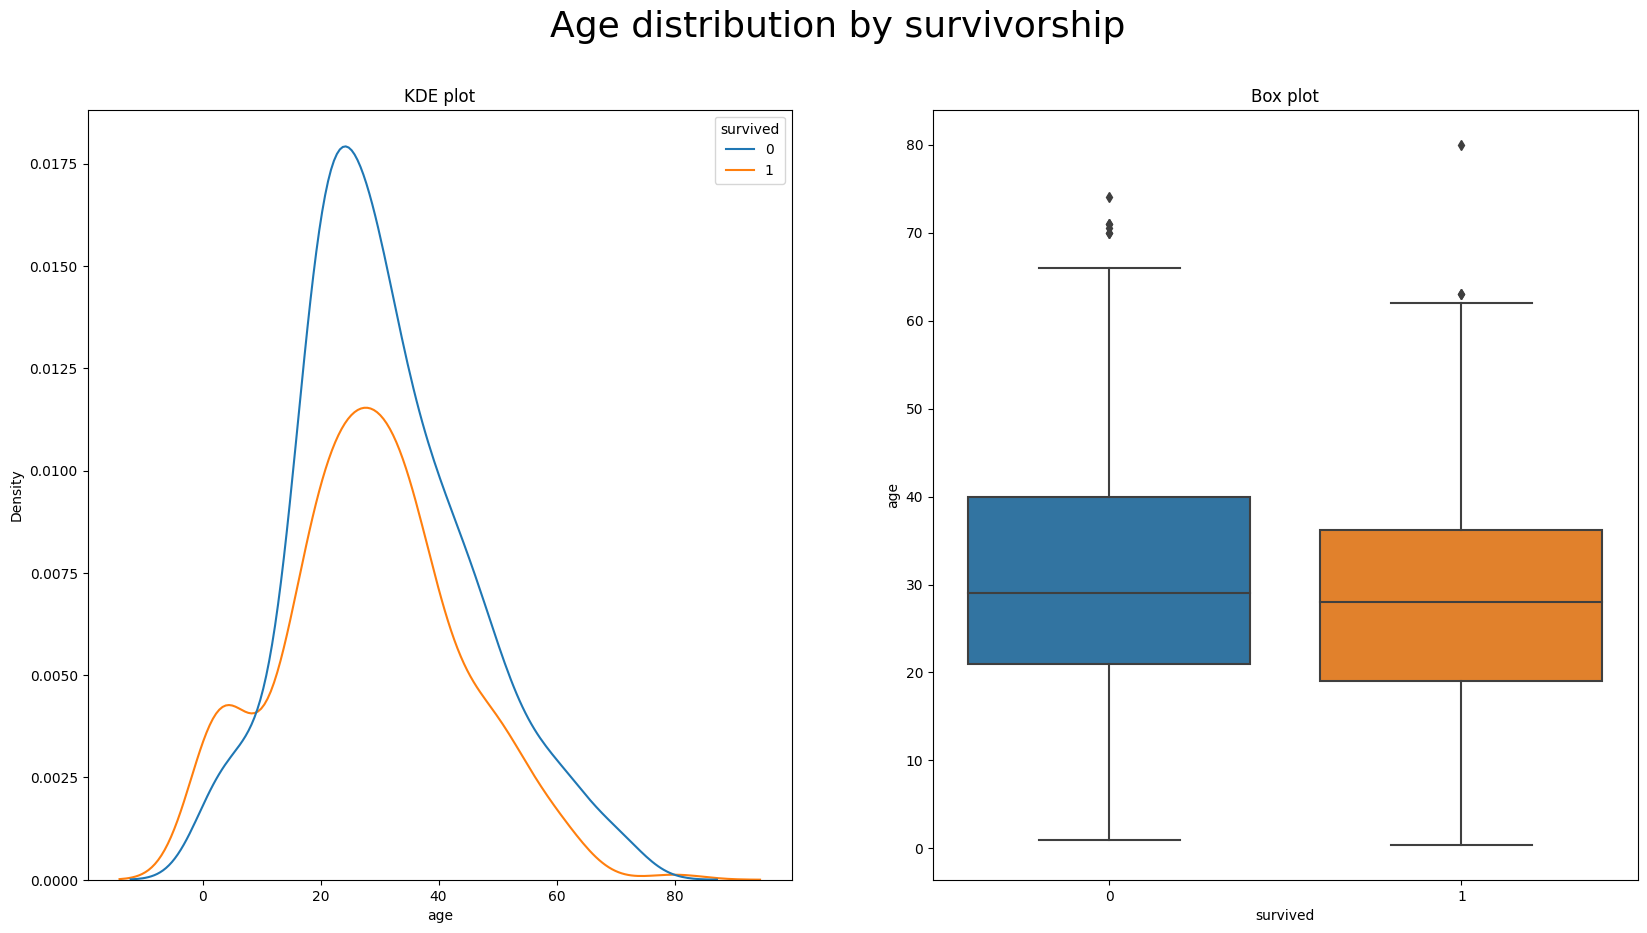

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
plt.suptitle("Age distribution by survivorship", fontsize=26)

sns.kdeplot( x="age", hue="survived", data=df2, ax=ax[0])
ax[0].set_title("KDE plot")

sns.boxplot(x="survived", y="age",  data=df2, ax=ax[1])
ax[1].set_title("Box plot")

plt.show()

Question: Is there a statistically significant relationship between age and survivorship? Specifically, does higher age correspond to a higher likelihood of survivorship?

**Hypothesis**

H0: There is no statistically significant difference in the mean age between survivors and non-survivors, i.e., μ1 = μ2

H1: There is statistically significant difference in the mean age between survivors and non-survivors, μ1 ≠ μ2

In [23]:
# check what's the mean for two groups: "survivors" and "non-survivors"
print(f"Mean age of survivors: {round(df2.loc[df2['survived'] == 1, 'age'].mean(),1)}")
print(f"Mean age of non-survivors: {round(df2.loc[df2['survived'] == 0, 'age'].mean(),1)}")

Mean age of survivors: 28.4
Mean age of non-survivors: 31.0


In [19]:
from scipy import stats

survived = df2.loc[df2["survived"] == 1, "age"].dropna()
non_survived = df2.loc[df2["survived"] ==0, "age"].dropna()
stats.ttest_ind(survived, non_survived)

Ttest_indResult(statistic=-2.258724310603486, pvalue=0.024218392684869396)

(iv) Is there a relation between Age and Fare? Find the Pearson correlation coefficient. Plot using a scatter plot and write your Interpretation. (2 points)

In [29]:
df2[["age","fare"]].corr()

,age,fare
age,1.000000,0.092707
fare,0.092707,1.000000


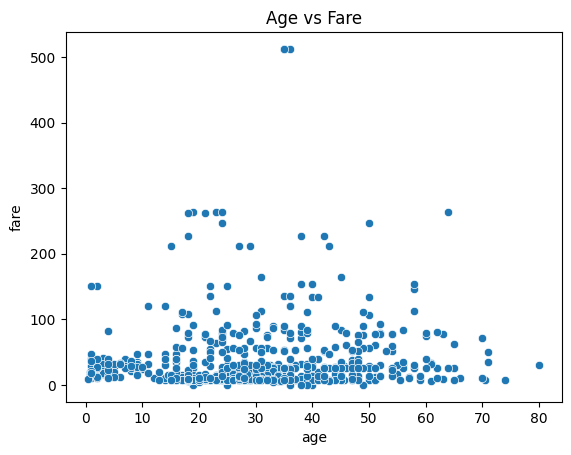

In [30]:
sns.scatterplot(x="age", y="fare", data=df2)
plt.title("Age vs Fare")
plt.show()

(v) Based on the port of embarkation, do you see any difference in median fares?

Plot a box plot and a distribution plot (hint: use port as color here for distribution plot and the sns.displot function) showing the different distributions of fare for each port of embarkation?

In the distribution plot where are the people who paid more than 500 dollars in fare from? For sns.displot use multiple=’stack’,height=10 and aspect=2. (2 points)


In [33]:
df2.dtypes

survived       category
pclass         category
sex            category
age             float64
sibsp          category
parch          category
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

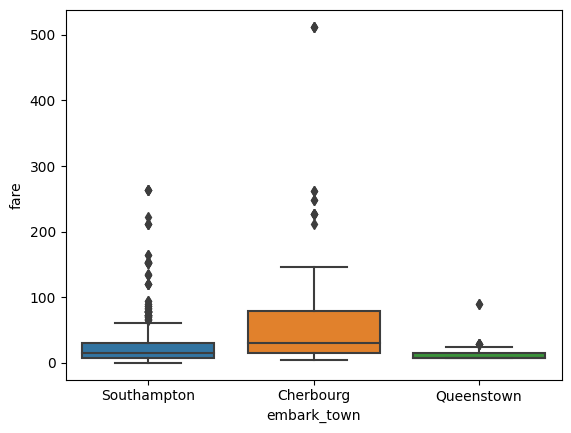

In [61]:
sns.boxplot(y="fare", x="embark_town", data=df2)
plt.show()

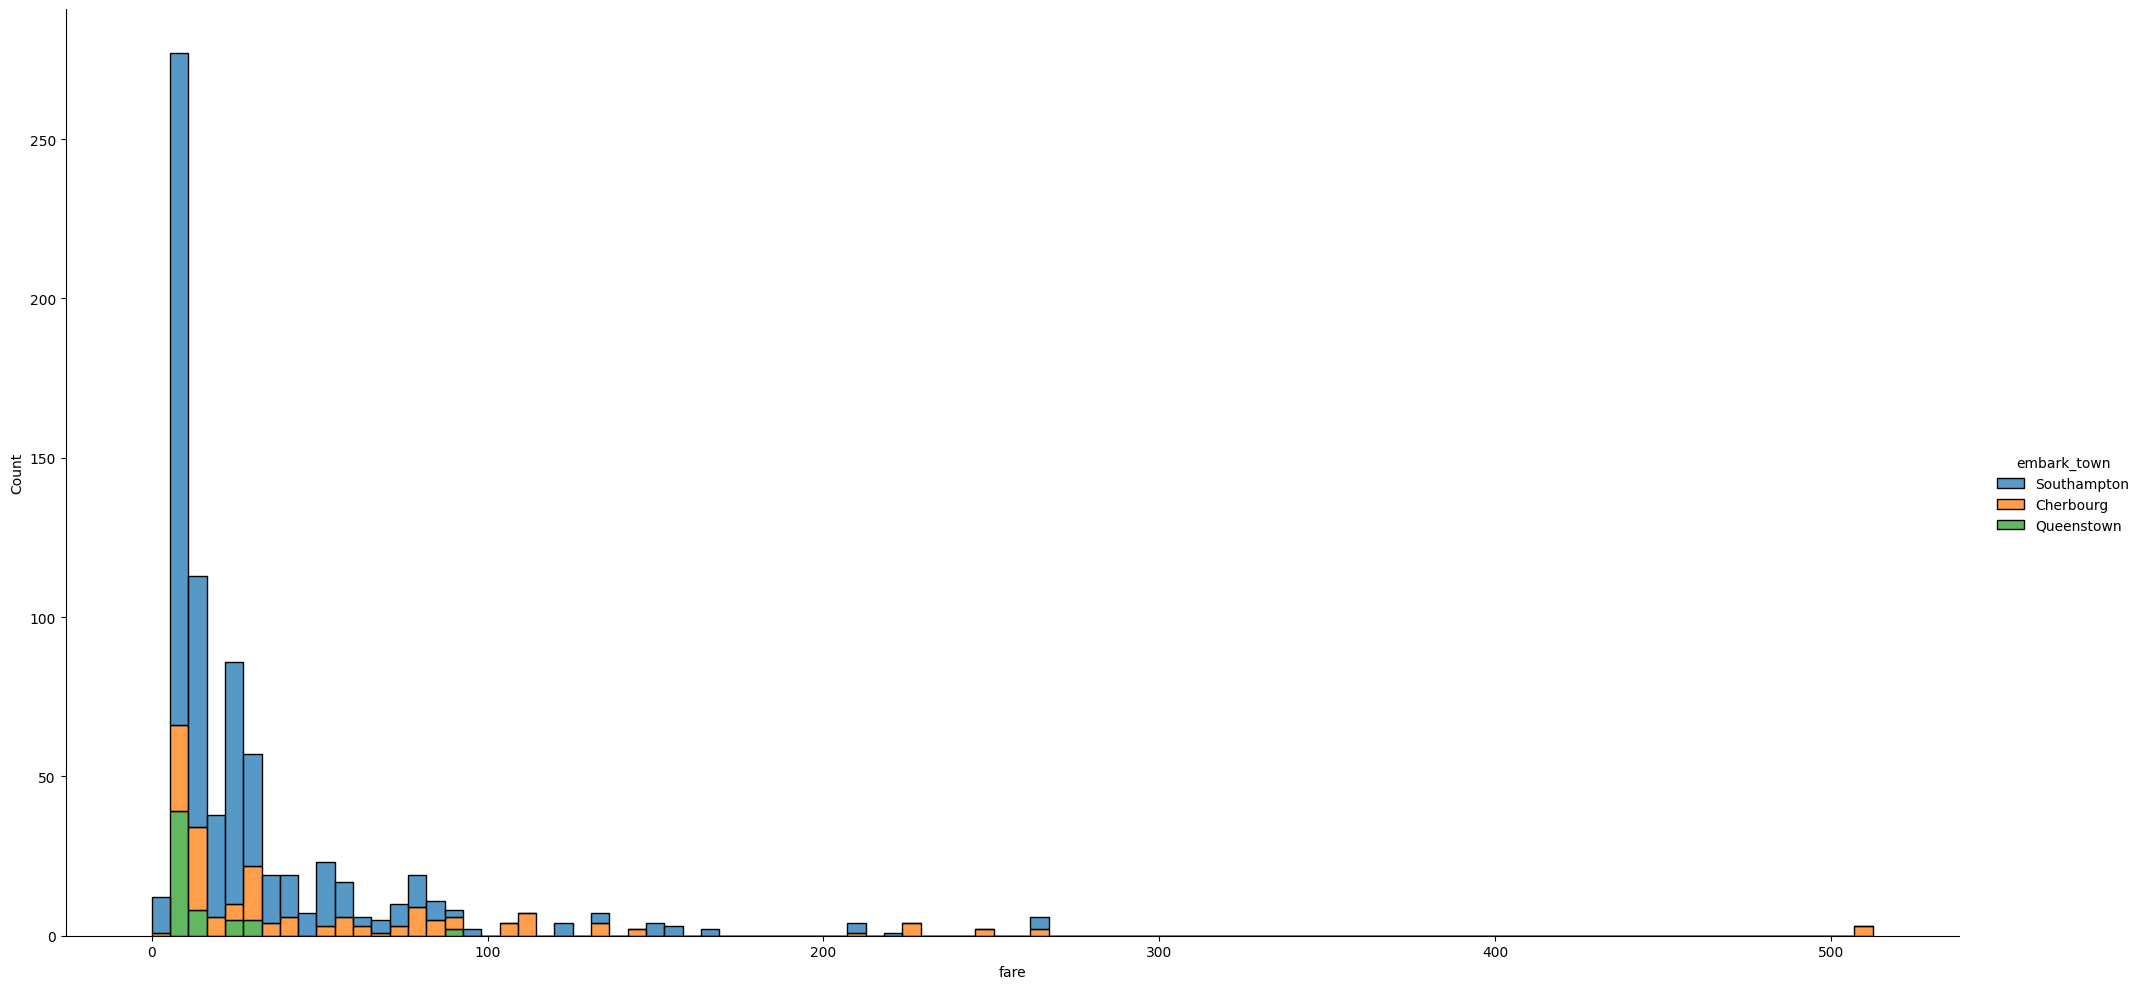

In [63]:
sns.displot(x="fare", hue="embark_town", data=df2,
            multiple="stack", height=10, aspect=2)
plt.show()